EN2550 - Funadamentals of Image Processing and Machine Vision
Assignment 04
Name         : Rathnayaka R.G.H.V.
Index Number : 180529E

In [19]:
# Importing required libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models

1.Linear Classifier

In [3]:
#1.(a) Implementing gradient descent and running for 300 epochs
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() # Importing data set CIFAR10
K = len(np.unique(y_train)) # Classes (np.unique is to find the unique elements of an array)
Ntr = x_train.shape[0] # Number of training data
Nte = x_test.shape[0] # Number of testing data
Din = x_train.shape[1]*x_train.shape[2]*x_train.shape[3] # CIFAR10
    
# Normalizing pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
    
# Centering pixel values
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

# One hot encoding the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Flatterning the input images and changing the data type
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

# Defining parameters
iterations = 300 # Number of iterations in gradient descent
lr = 1.4e-2 # Learning rate
lr_decay= 0.999
reg = 5e-6 # Regularization constant for the loss function - Lamda

# Initializing weight and bias arrays
Din=x_train.shape[1]
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
K = y_test.shape[1]
batch_size=x_train.shape[0]

# Running the linear classifier
lr_history = []
loss_history = [] # Loss function values
loss_history_test = [] 
train_acc_history = [] # Training accuracy
val_acc_history = [] # Validating accuracy
seed = 0
rng = np.random.default_rng(seed=seed)

# Defining a function for regularized loss
def regloss(y_pred,y,w1,w2=0):
    batch_size=y_pred.shape[0] # Determining the number of input data
    loss=(1/(batch_size))*(np.square(y-y_pred)).sum()+reg*(np.sum(w1*w1)+np.sum(w2*w2))
    return loss

# Defining a function for accuracy
def accuracy(y_pred,y):
    batch_size=y_pred.shape[0] # Determining the number of input data
    K=y_pred.shape[1] # Determining number of classes
    acc=1-(1/(batch_size*K))*(np.abs(np.argmax(y,axis=1)-np.argmax(y_pred,axis=1))).sum()
    return acc

for t in range(iterations):
    # Shuffling the training data set to randomize the training process.To prevent overfitting
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]

    # Forward pass
    y_pred=x.dot(w1)+b1
    y_pred_test=x_test.dot(w1)+b1

    # Calculating losses
    train_loss=regloss(y_pred,y,w1)
    test_loss=regloss(y_pred_test,y_test,w1)
    loss_history.append(train_loss)
    loss_history_test.append(test_loss)
        
    # Calculating accuracies
    train_acc=accuracy(y_pred,y)
    train_acc_history.append(train_acc)
    test_acc=accuracy(y_pred_test,y_test)
    val_acc_history.append(test_acc)

    if t%10 == 0:
        print('epoch %d|%d:Learning rate=%f|Training loss=%f|Testing loss=%f|Training accuracy=%f|Testing accuracy=%f' % (t,iterations,lr,train_loss,test_loss,train_acc,test_acc))

    # Backward pass
    dy_pred=(1./batch_size)*2.0*(y_pred-y)
    dw1=x.T.dot(dy_pred)+reg*w1
    db1=dy_pred.sum(axis=0)

    # Updating parameters
    w1-=lr*dw1
    b1-=lr*db1
    # Decaying learning rate
    lr_history.append(lr)
    lr = lr*lr_decay

x_train: (50000, 3072)
x_test: (10000, 3072)
y_train: (50000, 10)
y_test: (10000, 10)
epoch 0|300:Learning rate=0.014000|Training loss=1.000027|Testing loss=1.000030|Training accuracy=0.650034|Testing accuracy=0.649890
epoch 10|300:Learning rate=0.013861|Training loss=0.876637|Testing loss=0.876238|Training accuracy=0.756478|Testing accuracy=0.758100
epoch 20|300:Learning rate=0.013723|Training loss=0.842540|Testing loss=0.842418|Training accuracy=0.762598|Testing accuracy=0.767620
epoch 30|300:Learning rate=0.013586|Training loss=0.823616|Testing loss=0.823716|Training accuracy=0.766496|Testing accuracy=0.770590
epoch 40|300:Learning rate=0.013451|Training loss=0.812388|Testing loss=0.812707|Training accuracy=0.768642|Testing accuracy=0.771540
epoch 50|300:Learning rate=0.013317|Training loss=0.805425|Testing loss=0.805970|Training accuracy=0.770318|Testing accuracy=0.772920
epoch 60|300:Learning rate=0.013184|Training loss=0.800905|Testing loss=0.801679|Training accuracy=0.771518|Tes

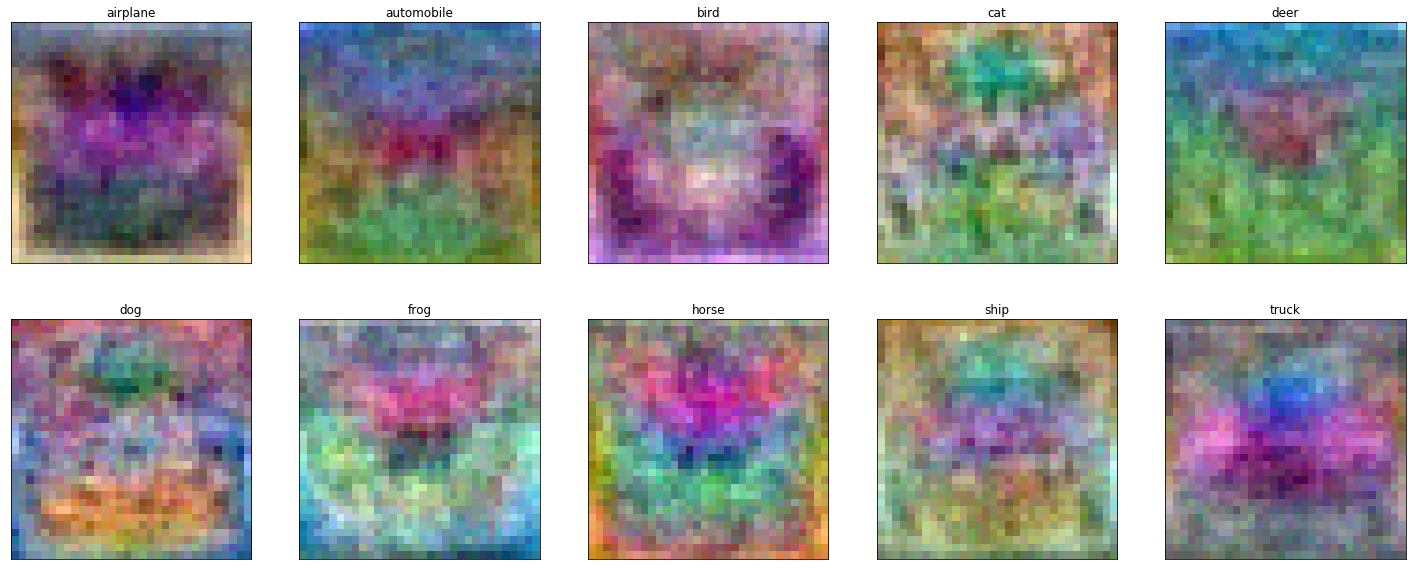

In [9]:
#1.(b) Showing the weights matrix W as 10 images
images=[]
titles=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
for i in range(w1.shape[1]):
    temp=np.reshape(w1[:,i]*255,(32,32,3))
    temp=cv.normalize(temp, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
    images.append(temp)
fig,ax=plt.subplots(2,5,figsize=(25,10))
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(images[i*5+j],vmin=0,vmax=255)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].set_title(titles[i*5+j])
plt.savefig('1.b.jpg')
plt.show()

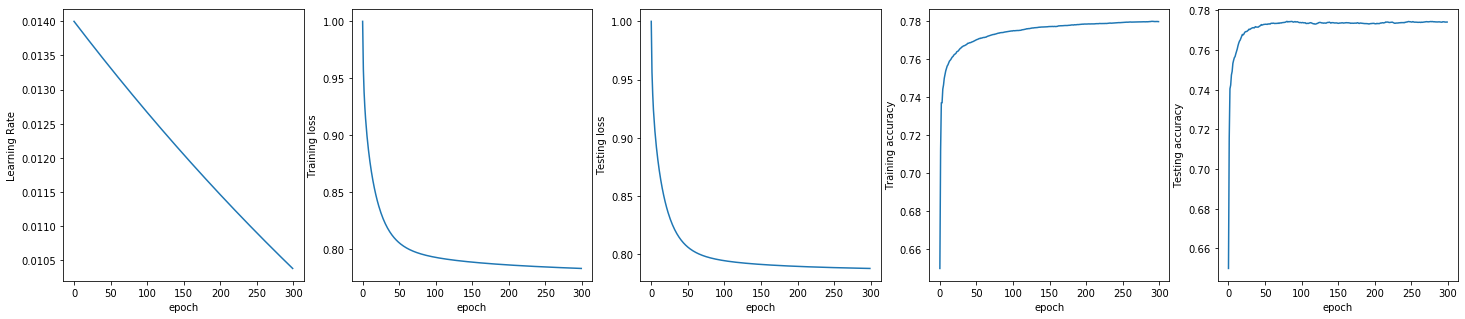

In [10]:
#1.(c) Plots for learning rate, training and testing loss and accuracies
lists=[lr_history,loss_history,loss_history_test,train_acc_history,val_acc_history]
titles=["Learning Rate","Training loss","Testing loss","Training accuracy","Testing accuracy"]
fig,ax=plt.subplots(1,5,figsize=(25,5))
n=2
labels=[]
for i in range(len(lists)):
    ax[i].plot(lists[i])
    ax[i].set_ylabel(titles[i])
    ax[i].set_xlabel("epoch")
    ax[i].plot()
plt.savefig('1.c.jpg')

2.Two-Layer fully connected network

In [11]:
#2.(a) Implementing gradient descent and running for 300 epochs
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() # Importing data set CIFAR10
K = len(np.unique(y_train)) # Classes (np.unique is to find the unique elements of an array)
Ntr = x_train.shape[0] # Number of training data
Nte = x_test.shape[0] # Number of testing data
Din = x_train.shape[1]*x_train.shape[2]*x_train.shape[3] # CIFAR10
    
# Centering pixel values
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

# One hot encoding the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Flatterning the input images and changing the data type
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

# Defining parameters
H=200 # Number of hidden nodes
iterations = 300 # Number of iterations in gradient descent
lr = 1.4e-2 # Learning rate
lr_decay= 0.999
reg = 5e-6 # Regularization constant for the loss function - Lamda

# Initializing weight and bias arrays
Din=x_train.shape[1]
std=1e-5
w1 = (2/(Ntr*Din))**0.5*np.random.randn(Din, H)
w2 = (2/(H*Din))**0.5*np.random.randn(H, K)
b1 = np.zeros(H)
b2 = np.zeros(K)
K = y_test.shape[1]
batch_size=x_train.shape[0]

# Running the linear classifier
lr_history2 = []
loss_history2 = [] # Loss function values
loss_history_test2 = [] 
train_acc_history2 = [] # Training accuracy
val_acc_history2 = [] # Validating accuracy
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    # Mini batching the training data set
    indices = np.random.choice(Ntr,batch_size)
    # Shuffling the training data set to avoid overfitting
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]

    # Forward pass
    h=1/(1+np.exp(-(x.dot(w1)+b1)))
    h_test=1/(1+np.exp(-((x_test).dot(w1)+b1)))
    y_pred=h.dot(w2)+b2
    y_pred_test=h_test.dot(w2)+b2

    # Calculating the loss
    train_loss=regloss(y_pred,y,w1,w2)
    test_loss=regloss(y_pred_test,y_test,w1,w2)
    loss_history2.append(train_loss)
    loss_history_test2.append(test_loss)
        
    # Calculating accuracy
    train_acc=accuracy(y_pred,y)
    train_acc_history2.append(train_acc)
    test_acc=accuracy(y_pred_test,y_test)
    val_acc_history2.append(test_acc)

    if t%10 == 0:
        print('epoch %d|%d:Learning rate=%f|Training loss=%f|Testing loss=%f|Training accuracy=%f|Testing accuracy=%f' % (t,iterations,lr,train_loss,test_loss,train_acc,test_acc))

    # Backward pass
    dy_pred=(1./batch_size)*2.0*(y_pred-y)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h))+reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)

    # Updating parameters
    w1-=lr*dw1
    b1-=lr*db1
    w2-=lr*dw2
    b2-=lr*db2
    # Decaying learning rate
    lr_history2.append(lr)
    lr = lr*lr_decay


x_train: (50000, 3072)
x_test: (10000, 3072)
y_train: (50000, 10)
y_test: (10000, 10)
epoch 0|300:Learning rate=0.014000|Training loss=1.009260|Testing loss=1.009282|Training accuracy=0.556202|Testing accuracy=0.551540
epoch 10|300:Learning rate=0.013861|Training loss=0.820215|Testing loss=0.821419|Training accuracy=0.751648|Testing accuracy=0.753010
epoch 20|300:Learning rate=0.013723|Training loss=0.810122|Testing loss=0.811090|Training accuracy=0.757276|Testing accuracy=0.759150
epoch 30|300:Learning rate=0.013586|Training loss=0.802125|Testing loss=0.802647|Training accuracy=0.765862|Testing accuracy=0.766480
epoch 40|300:Learning rate=0.013451|Training loss=0.792240|Testing loss=0.795661|Training accuracy=0.769060|Testing accuracy=0.768570
epoch 50|300:Learning rate=0.013317|Training loss=0.790450|Testing loss=0.791795|Training accuracy=0.769252|Testing accuracy=0.771040
epoch 60|300:Learning rate=0.013184|Training loss=0.778092|Testing loss=0.783291|Training accuracy=0.776232|Tes

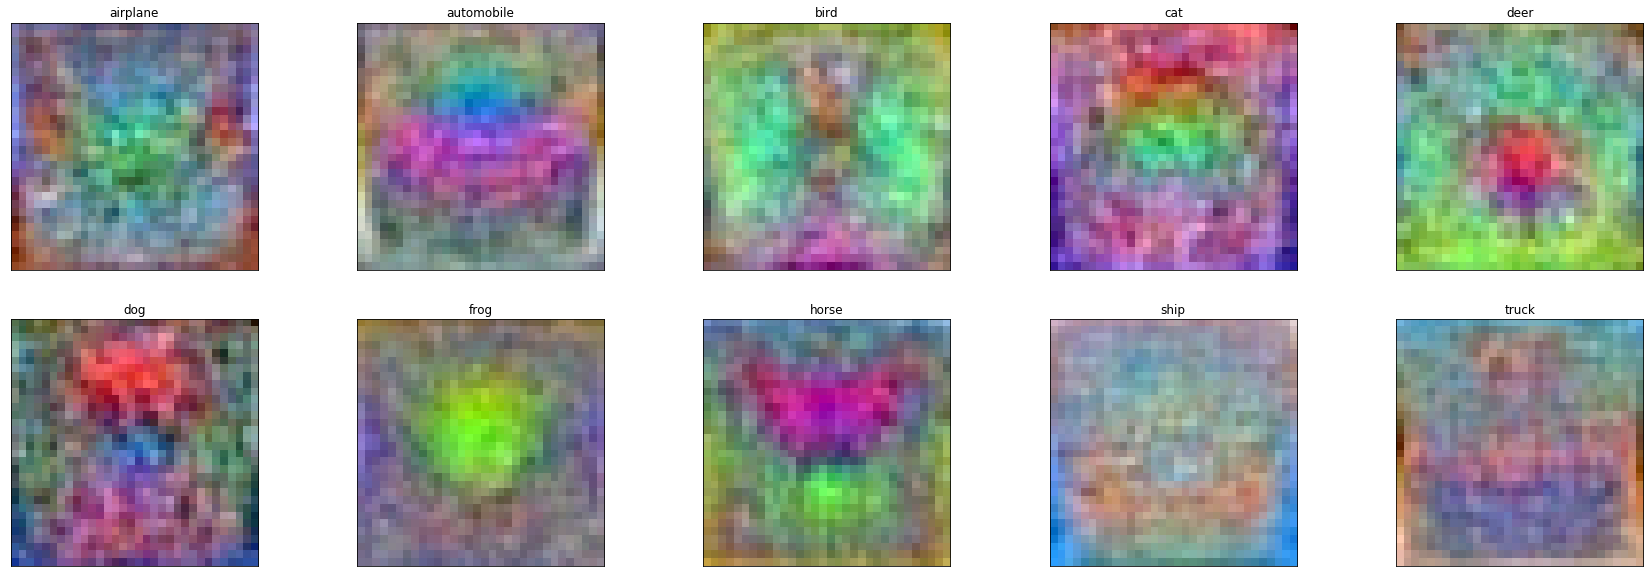

In [12]:
images=[]
w12=(1/(1+np.exp(-w1))).dot(w2)
titles=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
for i in range(w12.shape[1]):
    temp=np.reshape(w12[:,i]*255,(32,32,3))
    temp=cv.normalize(temp, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
    images.append(temp)
fig,ax=plt.subplots(2,5,figsize=(30,10))
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(images[i*5+j],vmin=0,vmax=255)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].set_title(titles[i*5+j])
plt.savefig('2.a.jpg')
plt.show()

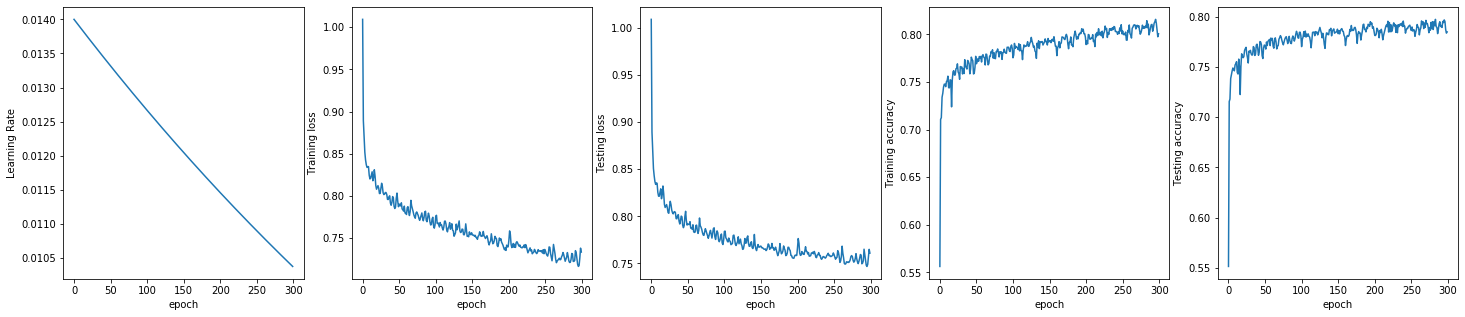

In [13]:
#2.(b) Plots for learning rate, training and testing loss and accuracies
lists=[lr_history2,loss_history2,loss_history_test2,train_acc_history2,val_acc_history2]
titles=["Learning Rate","Training loss","Testing loss","Training accuracy","Testing accuracy"]
fig,ax=plt.subplots(1,5,figsize=(25,5))
n=2
labels=[]
for i in range(len(lists)):
    ax[i].plot(lists[i])
    ax[i].set_ylabel(titles[i])
    ax[i].set_xlabel("epoch")
    ax[i].plot()
plt.savefig('2.b.jpg')

3.Stochastic gradient descent with a batch size of 500

In [14]:
#3.(a) Implementing gradient descent and running for 300 epochs
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() # Importing data set CIFAR10
K = len(np.unique(y_train)) # Classes (np.unique is to find the unique elements of an array)
Ntr = x_train.shape[0] # Number of training data
Nte = x_test.shape[0] # Number of testing data
Din = x_train.shape[1]*x_train.shape[2]*x_train.shape[3] # CIFAR10
    
# Centering pixel values
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

# One hot encoding the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Flatterning the input images and changing the data type
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

# Defining parameters
batch_size=500
H=200 # Number of hidden nodes
iterations = 300 # Number of iterations in gradient descent
lr = 1.4e-2 # Learning rate
lr_decay= 0.999
reg = 5e-6 # Regularization constant for the loss function - Lamda

# Initializing weight and bias arrays
Din=x_train.shape[1]
std=1e-5
w1 = (2/(Ntr*Din))**0.5*np.random.randn(Din, H)
w2 = (2/(H*Din))**0.5*np.random.randn(H, K)
b1 = np.zeros(H)
b2 = np.zeros(K)
K = y_test.shape[1]

# Running the linear classifier
lr_history3 = []
loss_history3 = [] # Loss function values
loss_history_test3 = [] 
train_acc_history3 = [] # Training accuracy
val_acc_history3 = [] # Validating accuracy
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    # Mini batching the training data set
    indices = np.random.choice(Ntr,batch_size)
    # Shuffling the training data set to avoid overfitting
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]

    # Forward pass
    h=1/(1+np.exp(-(x.dot(w1)+b1)))
    h_test=1/(1+np.exp(-((x_test).dot(w1)+b1)))
    y_pred=h.dot(w2)+b2
    y_pred_test=h_test.dot(w2)+b2

    # Calculating the loss
    train_loss=regloss(y_pred,y,w1,w2)
    test_loss=regloss(y_pred_test,y_test,w1,w2)
    loss_history3.append(train_loss)
    loss_history_test3.append(test_loss)
        
    # Calculating accuracy
    train_acc=accuracy(y_pred,y)
    train_acc_history3.append(train_acc)
    test_acc=accuracy(y_pred_test,y_test)
    val_acc_history3.append(test_acc)

    if t%10 == 0:
        print('epoch %d|%d:Learning rate=%f|Training loss=%f|Testing loss=%f|Training accuracy=%f|Testing accuracy=%f' % (t,iterations,lr,train_loss,test_loss,train_acc,test_acc))

    # Backward pass
    dy_pred=(1./batch_size)*2.0*(y_pred-y)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h))+reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)

    # Updating parameters
    w1-=lr*dw1
    b1-=lr*db1
    w2-=lr*dw2
    b2-=lr*db2
    # Decaying learning rate
    lr_history3.append(lr)
    lr = lr*lr_decay

x_train: (50000, 3072)
x_test: (10000, 3072)
y_train: (50000, 10)
y_test: (10000, 10)
epoch 0|300:Learning rate=0.014000|Training loss=1.001928|Testing loss=1.002842|Training accuracy=0.699800|Testing accuracy=0.690000
epoch 10|300:Learning rate=0.013861|Training loss=0.847318|Testing loss=0.839683|Training accuracy=0.733800|Testing accuracy=0.732230
epoch 20|300:Learning rate=0.013723|Training loss=0.826435|Testing loss=0.823892|Training accuracy=0.760600|Testing accuracy=0.761130
epoch 30|300:Learning rate=0.013586|Training loss=0.822216|Testing loss=0.822190|Training accuracy=0.754800|Testing accuracy=0.750820
epoch 40|300:Learning rate=0.013451|Training loss=0.807731|Testing loss=0.806952|Training accuracy=0.751000|Testing accuracy=0.757820
epoch 50|300:Learning rate=0.013317|Training loss=0.796595|Testing loss=0.799110|Training accuracy=0.750800|Testing accuracy=0.768070
epoch 60|300:Learning rate=0.013184|Training loss=0.796671|Testing loss=0.800674|Training accuracy=0.756200|Tes

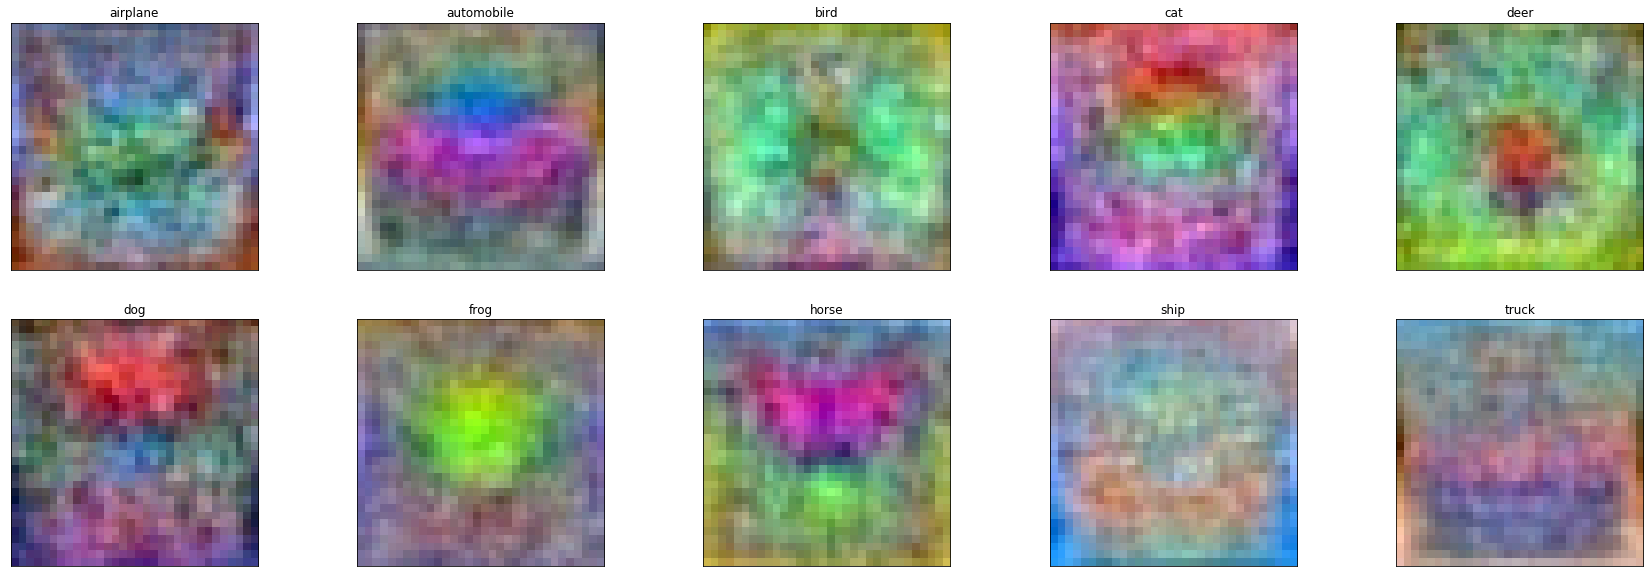

In [15]:
images=[]
w12=(1/(1+np.exp(-w1))).dot(w2)
titles=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
for i in range(w12.shape[1]):
    temp=np.reshape(w12[:,i]*255,(32,32,3))
    temp=cv.normalize(temp, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
    images.append(temp)
fig,ax=plt.subplots(2,5,figsize=(30,10))
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(images[i*5+j],vmin=0,vmax=255)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].set_title(titles[i*5+j])
plt.savefig('3.a.jpg')
plt.show()

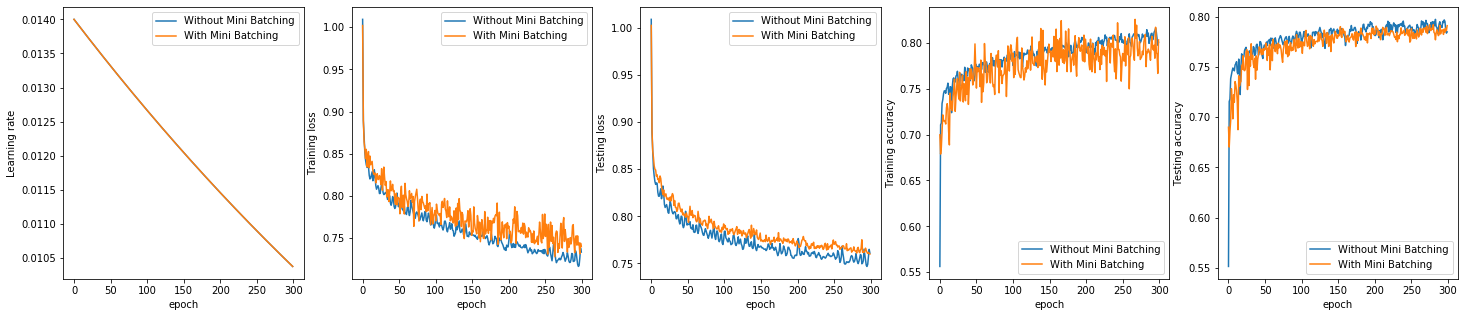

In [16]:
#3.(b) Comparision of results
lists=[[lr_history2,lr_history3],[loss_history2,loss_history3],[loss_history_test2,loss_history_test3],[train_acc_history2,train_acc_history3],[val_acc_history2,val_acc_history3]]
titles=["Learning rate","Training loss","Testing loss","Training accuracy","Testing accuracy"]
fig,ax=plt.subplots(1,5,figsize=(25,5))
n=2
labels=["Without Mini Batching","With Mini Batching"]
for i in range(len(lists)):
    for j in range(n):
        ax[i].plot(lists[i][j],label=labels[j])
    ax[i].legend()  
    ax[i].set_ylabel(titles[i])
    ax[i].set_xlabel("epoch")
    ax[i].plot()
plt.savefig('3.b.jpg')

4.CNN

In [1]:
#4.(a) Learnable parameters
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() # Importing data set CIFAR10
K = len(np.unique(y_train)) # Classes (np.unique is to find the unique elements of an array)
Ntr = x_train.shape[0] # Number of training data
Nte = x_test.shape[0] # Number of testing data
Din = x_train.shape[1]*x_train.shape[2]*x_train.shape[3] # CIFAR10
    
# Normalizing pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
    
# Centering pixel values
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

# One hot encoding the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

model.summary()
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=45,batch_size=50,validation_data=(x_test,y_test))

NameError: name 'keras' is not defined

In [ ]:
#4.(b) Learning rate & Momentum
print(model.optimizer.get_config())

In [ ]:
#3.(c) Plots for training and testing loss and accuracies
lists=history.history['loss'],history.history['val_loss'],history.history['accuracy'],history.history['val_accuracy']
titiles=["Training loss","Testing loss","Training accuracy","Testing accuracy"]
fig,ax=plt.subplots(1,4,figsize=(25,5))
n=2
labels=[]
for i in range(len(lists)):
    ax[i].plot(lists[i])
    ax[i].set_ylabel(titiles[i])
    ax[i].set_xlabel("epoch")
    ax[i].plot()